<a href="https://colab.research.google.com/github/bheemas790/Assignment-1/blob/main/Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> Clustering Project </h1> </center>
<center> <h2>Data Analytics - I </h2> </center>



# Introduction -
This Project details about approach to data exploratory analysis, data visualization and applying different types of clustering methods to recognize patters in the given data.

Dataset contains features of around 18k football players, the following tasks are performed on the data

**Tasks**

1.   Data Preparation, Data clearning and Data Visualization
2.   K-Means clustering from scratch
3.   Hierarchical Clustering
4.   DB Scan







# Data Preparation, Data Clearning and Feature Engineering




1. Read dataset 
2. Drop string type features such as 0, name, photo, flag and Club Logo which are not useful for the problem
3. Convert categorical data to numeric data - Nationality, Club, Preferred Foot, 	Work Rate, Body Type, Real face, position
4. Convert Value, Wage and Release Clause features into integers
5. Impute missing data by its mode (90% of features are integers without decimal. Hence mode is taken for imputation of missing values in all the columns)
6. Convert Height into meters
7. Remove string 'lbs' in Weight
8. Convert "date" and "Contract Valid Until" to numeric
9. Convert LS to RB features by skipping +2, +4..etc
10. Check the data if everything is in numeric
11. Normalize data by taking its mean and standard deviation (used sklearn preprocessing) 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/MyDrive/DA datasets')
os.listdir()


['football_data.csv']

In [ ]:
# Read data
data = pd.read_csv('football_data.csv', header=0)

In [ ]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
data.describe() # check Descriptive statistics

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [ ]:
len(data)

18207

In [ ]:
data.head

<bound method NDFrame.head of        Unnamed: 0      ID  ... GKReflexes  Release Clause
0               0  158023  ...        8.0         €226.5M
1               1   20801  ...       11.0         €127.1M
2               2  190871  ...       11.0         €228.1M
3               3  193080  ...       94.0         €138.6M
4               4  192985  ...       13.0         €196.4M
...           ...     ...  ...        ...             ...
18202       18202  238813  ...        9.0           €143K
18203       18203  243165  ...       12.0           €113K
18204       18204  241638  ...       13.0           €165K
18205       18205  246268  ...        9.0           €143K
18206       18206  246269  ...        9.0           €165K

[18207 rows x 89 columns]>

In [ ]:
data['Loaned From'].isnull().sum()

16943

In [ ]:
names = list(data['Name'])

In [ ]:
# Drop feature that are not useful. Name, Photo, Flag and Club Logo are text fields and they do not contribute to solve the problem. Loaned From
# Loaned From feature has 93% missing values, hence it has to be droped
data = data.drop(data.columns[0],axis=1)
data = data.drop(columns=['Name', 'Photo', 'Flag', 'Club Logo', 'Loaned From'], axis=1, errors = 'raise')


In [ ]:
# Convert data type of attributes to categorical
data['Nationality'] = data['Nationality'].astype('category')
data['Club'] = data['Club'].astype('category')
data['Preferred Foot'] = data['Preferred Foot'].astype('category')
data['Work Rate'] = data['Work Rate'].astype('category')
data['Body Type'] = data['Body Type'].astype('category')
data['Real Face'] = data['Real Face'].astype('category')
data['Position'] = data['Position'].astype('category')


In [ ]:
cat_columns = data.select_dtypes(['category']).columns
cat_columns

Index(['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type',
       'Real Face', 'Position'],
      dtype='object')

In [ ]:
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.head()

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,6,94,94,212,€110.5M,€565K,2202,0,5.0,4.0,4.0,8,4,1,21,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,33,123,94,94,326,€77M,€405K,2228,1,5.0,4.0,5.0,1,1,1,26,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,26,20,92,93,435,€118.5M,€290K,2143,1,5.0,5.0,5.0,2,5,1,14,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,27,139,91,93,375,€72M,€260K,1471,1,4.0,3.0,1.0,8,3,1,5,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,27,13,91,92,374,€102M,€355K,2281,1,4.0,5.0,4.0,0,6,1,19,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
len(data)

18207

**Missing Value imputation**

In [ ]:
data.isnull().any(axis=1).sum()

3464

The above result shows that 19% of data is missing. Hence dropping the rows is not good idea. 

Except two features, all features have values with integers without decimal numbers. Replace the missing value with mean will give decimal value numbers. Hence I am replacing missing values with mode.

In [ ]:
# Imputed missing values using mode of each feature
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [ ]:
data['LS'].dtypes

dtype('O')

In [ ]:
# Check if all missing values are imputed
data.isnull().sum()

ID                0
Age               0
Nationality       0
Overall           0
Potential         0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 83, dtype: int64

In [ ]:
# Convert Value, Wage and Release clause attributes from string to float by replacing M and K 
data['Value'] = data['Value'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
data['Wage'] = data['Wage'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
data['Release Clause'] = data['Release Clause'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

In [ ]:
data['Value']

0        110500000
1         77000000
2        118500000
3         72000000
4        102000000
           ...    
18202        60000
18203        60000
18204        60000
18205        60000
18206        60000
Name: Value, Length: 18207, dtype: int64

In [ ]:
# convert 'Joined' from object type to datetime
data['Joined'] = pd.to_datetime(data['Joined'])

In [ ]:
conversions = [30.48, 2.54]


data['Height'] = data['Height'].apply(lambda x: pd.Series(map(int, x.split("'"))).dot(conversions))

In [ ]:
data['Weight'] = data['Weight'].str.replace(r'lbs', '').astype(int)

In [ ]:
data.head()

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,6,94,94,212,110500000,565000,2202,0,5.0,4.0,4.0,8,4,1,21,10.0,2004-07-01,2021,170.18,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000
1,20801,33,123,94,94,326,77000000,405000,2228,1,5.0,4.0,5.0,1,1,1,26,7.0,2018-07-10,2022,187.96,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000
2,190871,26,20,92,93,435,118500000,290000,2143,1,5.0,5.0,5.0,2,5,1,14,10.0,2017-08-03,2022,175.26,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000
3,193080,27,139,91,93,375,72000000,260000,1471,1,4.0,3.0,1.0,8,3,1,5,1.0,2011-07-01,2020,193.04,168,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,...,61+2,63+2,63+2,63+2,61+2,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000
4,192985,27,13,91,92,374,102000000,355000,2281,1,4.0,5.0,4.0,0,6,1,19,7.0,2015-08-30,2023,180.34,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000


In [ ]:
columns = data.columns.values.tolist()
type(columns)

list

In [ ]:
data['LAM'].dtypes

dtype('O')

In [ ]:
col_names = columns[22:48] # Extract columns with football positions

In [ ]:
col_names

['LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB']

In [ ]:
type_col = data.dtypes['RS']
type_col

dtype('O')

In [ ]:
data['RB'].dtypes

dtype('O')

In [ ]:
# split the value with '+' character and extract data left to '+' value
for cols in col_names:
  #data[cols] = data[cols].astype('O')
  data[cols] = data[cols].str.split('+').str[0].astype(int)


In [ ]:
data['LS'] # Check if data is formated correctly

0        88
1        91
2        84
3        61
4        82
         ..
18202    42
18203    45
18204    45
18205    47
18206    43
Name: LS, Length: 18207, dtype: int64

In [ ]:
data.head()

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,6,94,94,212,110500000,565000,2202,0,5.0,4.0,4.0,8,4,1,21,10.0,2004-07-01,2021,170.18,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,...,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000
1,20801,33,123,94,94,326,77000000,405000,2228,1,5.0,4.0,5.0,1,1,1,26,7.0,2018-07-10,2022,187.96,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,...,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000
2,190871,26,20,92,93,435,118500000,290000,2143,1,5.0,5.0,5.0,2,5,1,14,10.0,2017-08-03,2022,175.26,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,...,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000
3,193080,27,139,91,93,375,72000000,260000,1471,1,4.0,3.0,1.0,8,3,1,5,1.0,2011-07-01,2020,193.04,168,61,61,61,63,61,61,61,63,61,61,61,61,58,58,58,61,61,62,...,61,63,63,63,61,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000
4,192985,27,13,91,92,374,102000000,355000,2281,1,4.0,5.0,4.0,0,6,1,19,7.0,2015-08-30,2023,180.34,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,...,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000


In [ ]:
data.head()

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,6,94,94,212,110500000,565000,2202,0,5.0,4.0,4.0,8,4,1,21,10.0,2004-07-01,2021,170.18,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,...,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000
1,20801,33,123,94,94,326,77000000,405000,2228,1,5.0,4.0,5.0,1,1,1,26,7.0,2018-07-10,2022,187.96,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,...,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000
2,190871,26,20,92,93,435,118500000,290000,2143,1,5.0,5.0,5.0,2,5,1,14,10.0,2017-08-03,2022,175.26,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,...,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000
3,193080,27,139,91,93,375,72000000,260000,1471,1,4.0,3.0,1.0,8,3,1,5,1.0,2011-07-01,2020,193.04,168,61,61,61,63,61,61,61,63,61,61,61,61,58,58,58,61,61,62,...,61,63,63,63,61,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000
4,192985,27,13,91,92,374,102000000,355000,2281,1,4.0,5.0,4.0,0,6,1,19,7.0,2015-08-30,2023,180.34,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,...,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000


In [ ]:
data['Joined'] = data['Joined'].astype(int) # Convert date to numeric

In [ ]:
data.select_dtypes(['object']).columns # Check if any features yet to be converted to numeric

Index(['Contract Valid Until'], dtype='object')

In [ ]:
# convert 'Joined' from object type to datetime
data['Contract Valid Until'] = pd.to_datetime(data['Contract Valid Until'])

In [ ]:
data['Contract Valid Until'] = data['Contract Valid Until'].astype(int) # convert date to numeric

In [ ]:
#Normalize data
# Mean normalization using sklearn
import pandas as pd
from sklearn import preprocessing

mean_scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
x_scaled = mean_scaler.fit_transform(data.values)
normalized_df = pd.DataFrame(x_scaled)

In [ ]:
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
0,-1.878072,1.258678,-1.466279,4.018287,3.698092,-0.567920,19.319674,25.240993,2.216573,-1.770806,9.877133,1.595825,2.170641,0.770605,-0.633221,3.114624,1.099431,-0.596685,-6.002864,0.662769,-1.648694,-0.448006,3.455141,3.455141,3.455141,3.471969,3.670297,3.670297,3.670297,3.471969,3.674021,3.674021,3.674021,3.578672,3.123005,3.123005,3.123005,3.578672,0.716146,0.372529,...,0.189210,-0.840160,-0.840160,-0.840160,0.189210,1.865526,2.532872,1.018887,2.131780,2.437282,2.202544,2.492024,2.929722,2.237309,2.256658,1.768978,1.453361,1.863615,3.683979,2.197292,1.712853,0.245419,0.552272,-0.503878,2.434945,-0.454908,-1.196031,2.256631,2.872438,1.687122,3.270147,-0.719778,-0.911841,-0.926096,-0.599281,-0.318271,-0.074075,-0.139411,-0.484726,20.816550
1,-6.457570,1.686961,0.979744,4.018287,3.698092,0.030422,13.331948,17.967832,2.311958,0.548695,9.877133,1.595825,3.494491,-1.660948,-2.342748,3.114624,1.666709,-0.784953,0.723652,1.454029,0.996510,1.093179,3.802743,3.802743,3.802743,3.151565,3.346632,3.346632,3.346632,3.151565,3.130300,3.130300,3.130300,3.233689,2.759927,2.759927,2.759927,3.233689,0.833789,0.372529,...,0.410119,-0.307310,-0.307310,-0.307310,0.410119,1.865526,2.481616,2.113422,1.518794,2.493864,1.726103,1.839101,1.898515,1.584339,2.136665,1.634835,1.795097,1.592391,3.795093,0.426584,2.293346,2.532235,1.560132,1.090911,2.382981,0.409600,-0.857604,2.307894,2.023169,2.324716,3.182588,-0.971182,-0.773306,-1.067093,-0.542710,-0.318271,-0.074075,-0.139411,-0.317448,11.504975
2,-0.781839,0.187972,-1.173592,3.728799,3.535128,0.602522,20.749578,12.740247,2.000121,0.548695,9.877133,3.111958,3.494491,-1.313583,-0.063378,3.114624,0.305241,-0.596685,0.275830,1.454029,-0.892922,-1.025951,2.991673,2.991673,2.991673,3.151565,3.238744,3.238744,3.238744,3.151565,3.239044,3.239044,3.239044,3.233689,2.759927,2.759927,2.759927,3.233689,0.833789,0.268536,...,0.299665,-0.840160,-0.840160,-0.840160,0.299665,1.593055,2.122825,0.558030,1.723123,2.324117,2.149606,2.219973,2.528697,1.649636,2.196661,1.970194,1.726750,2.202645,3.572865,1.418181,1.422607,-0.347459,1.119193,-1.301272,1.811382,0.006163,-0.519177,2.000314,2.377031,2.069678,3.095030,-1.021463,-1.096555,-0.597101,-0.429569,-0.436703,-0.074075,-0.080638,-0.317448,20.966434
3,-0.708118,0.402113,1.314243,3.584055,3.535128,0.287605,12.438258,11.376529,-0.465223,0.548695,7.336114,0.079691,-1.800906,0.770605,-1.203063,3.114624,-0.715861,-1.161488,-2.646172,-0.130659,1.752283,0.129938,0.326728,0.326728,0.326728,0.374724,0.217874,0.217874,0.217874,0.374724,0.194207,0.194207,0.194207,0.128839,-0.023671,-0.023671,-0.023671,0.128839,0.363216,0.476522,...,0.410119,0.580773,0.580773,0.580773,0.410119,-1.785585,-1.670106,-1.803862,-0.592602,-1.693233,-1.979543,-1.425515,-1.366972,-0.113383,-0.983162,-0.511466,-0.460359,-0.238369,3.128411,-1.485780,-1.421806,0.160723,-1.274473,-0.105181,-1.826069,-1.031247,-0.809257,-1.946967,1.032355,-0.544457,0.818511,-1.624833,-1.235090,-1.537085,4.152645,4.063716,4.294308,4.209722,4.310570,12.582270
4,-0.711288,0.402113,-1.319936,3.584055,3.372164,0.282356,17.800400,15.694969,2.506397,0.548695,7.336114,3.111958,2.170641,-2.008312,0.506464,3.114624,0.872519,-0.784953,-0.648705,2.245288,-0.137149,-0.769087,2.759938,2.759938,2.759938,2.937961,3.022968,3.022968,3.022968,2.937961,3.130300,3.130300,3.130300,3.233689,3.486083,3.486083,3.486083,3.233689,2.245507,2.036418,...,1.735569,0.847198,0.847198,0.847198,1.735569,2.355974,1.866546,0.154780,2.267999,2.210952,1.620228,2.056742,2.299540,2.498497,1.956675,0.897044,0.769890,1.049944,3.239524,0.922383,2.061149,-0.178065,1.686114,0.771953,2.279054,1.158841,0.689491,1.897787,2.872438,1.942159,2.569679,1.040051,0.473509,0.248884,-0.090146,-0.199839,-0.680795,-0.374499,-0.205930,17.996848


# Assignment 1 - Data Visualization

In [ ]:
# Plot histogram of foodball players with respect to height
# Sort Height in descending order and check value_counts
result = data.sort_values(['Height'], ascending=False)
result.value_counts()

ID      Age  Nationality  Overall  Potential  Club  Value    Wage   Special  Preferred Foot  International Reputation  Weak Foot  Skill Moves  Work Rate  Body Type  Real Face  Position  Jersey Number  Joined               Contract Valid Until  Height  Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  Release Clause
246620  17   144          51       74         302   70000    1000   1203     1               1.0                       3.0        2.0          3          3          0          1         32.0           154085760000000

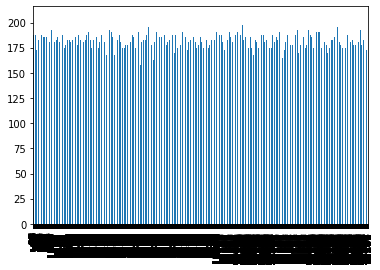

In [ ]:
data['Height'].plot(kind='bar')

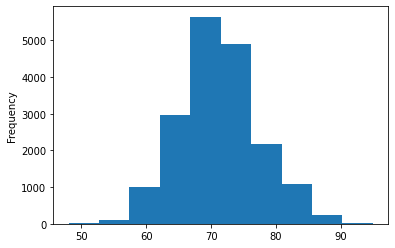

In [ ]:
data['Potential'].plot(kind='hist')

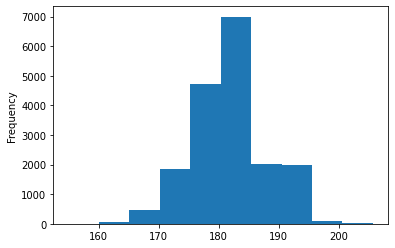

In [ ]:
data['Height'].plot(kind='hist')


It has been observed that maximum number of players are in the range of 180 to 185 meters height.

(array([   48.,     0.,     0.,     0.,     0.,  4211.,     0.,     0.,
            0., 13948.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

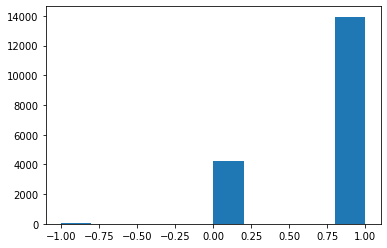

In [ ]:
counts, bins = np.histogram(data['Preferred Foot'])
plt.hist(bins[:-1], bins, weights=counts)

In [ ]:
data['Value']

0        110500000
1         77000000
2        118500000
3         72000000
4        102000000
           ...    
18202        60000
18203        60000
18204        60000
18205        60000
18206        60000
Name: Value, Length: 18207, dtype: int64

In [ ]:
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
0,-1.878072,1.258678,-1.466279,4.018287,3.698092,-0.567920,19.319674,25.240993,2.216573,-1.770806,9.877133,1.595825,2.170641,0.770605,-0.633221,3.114624,1.099431,-0.596685,-6.002864,0.662769,-1.648694,-0.448006,3.455141,3.455141,3.455141,3.471969,3.670297,3.670297,3.670297,3.471969,3.674021,3.674021,3.674021,3.578672,3.123005,3.123005,3.123005,3.578672,0.716146,0.372529,...,0.189210,-0.840160,-0.840160,-0.840160,0.189210,1.865526,2.532872,1.018887,2.131780,2.437282,2.202544,2.492024,2.929722,2.237309,2.256658,1.768978,1.453361,1.863615,3.683979,2.197292,1.712853,0.245419,0.552272,-0.503878,2.434945,-0.454908,-1.196031,2.256631,2.872438,1.687122,3.270147,-0.719778,-0.911841,-0.926096,-0.599281,-0.318271,-0.074075,-0.139411,-0.484726,20.816550
1,-6.457570,1.686961,0.979744,4.018287,3.698092,0.030422,13.331948,17.967832,2.311958,0.548695,9.877133,1.595825,3.494491,-1.660948,-2.342748,3.114624,1.666709,-0.784953,0.723652,1.454029,0.996510,1.093179,3.802743,3.802743,3.802743,3.151565,3.346632,3.346632,3.346632,3.151565,3.130300,3.130300,3.130300,3.233689,2.759927,2.759927,2.759927,3.233689,0.833789,0.372529,...,0.410119,-0.307310,-0.307310,-0.307310,0.410119,1.865526,2.481616,2.113422,1.518794,2.493864,1.726103,1.839101,1.898515,1.584339,2.136665,1.634835,1.795097,1.592391,3.795093,0.426584,2.293346,2.532235,1.560132,1.090911,2.382981,0.409600,-0.857604,2.307894,2.023169,2.324716,3.182588,-0.971182,-0.773306,-1.067093,-0.542710,-0.318271,-0.074075,-0.139411,-0.317448,11.504975
2,-0.781839,0.187972,-1.173592,3.728799,3.535128,0.602522,20.749578,12.740247,2.000121,0.548695,9.877133,3.111958,3.494491,-1.313583,-0.063378,3.114624,0.305241,-0.596685,0.275830,1.454029,-0.892922,-1.025951,2.991673,2.991673,2.991673,3.151565,3.238744,3.238744,3.238744,3.151565,3.239044,3.239044,3.239044,3.233689,2.759927,2.759927,2.759927,3.233689,0.833789,0.268536,...,0.299665,-0.840160,-0.840160,-0.840160,0.299665,1.593055,2.122825,0.558030,1.723123,2.324117,2.149606,2.219973,2.528697,1.649636,2.196661,1.970194,1.726750,2.202645,3.572865,1.418181,1.422607,-0.347459,1.119193,-1.301272,1.811382,0.006163,-0.519177,2.000314,2.377031,2.069678,3.095030,-1.021463,-1.096555,-0.597101,-0.429569,-0.436703,-0.074075,-0.080638,-0.317448,20.966434
3,-0.708118,0.402113,1.314243,3.584055,3.535128,0.287605,12.438258,11.376529,-0.465223,0.548695,7.336114,0.079691,-1.800906,0.770605,-1.203063,3.114624,-0.715861,-1.161488,-2.646172,-0.130659,1.752283,0.129938,0.326728,0.326728,0.326728,0.374724,0.217874,0.217874,0.217874,0.374724,0.194207,0.194207,0.194207,0.128839,-0.023671,-0.023671,-0.023671,0.128839,0.363216,0.476522,...,0.410119,0.580773,0.580773,0.580773,0.410119,-1.785585,-1.670106,-1.803862,-0.592602,-1.693233,-1.979543,-1.425515,-1.366972,-0.113383,-0.983162,-0.511466,-0.460359,-0.238369,3.128411,-1.485780,-1.421806,0.160723,-1.274473,-0.105181,-1.826069,-1.031247,-0.809257,-1.946967,1.032355,-0.544457,0.818511,-1.624833,-1.235090,-1.537085,4.152645,4.063716,4.294308,4.209722,4.310570,12.582270
4,-0.711288,0.402113,-1.319936,3.584055,3.372164,0.282356,17.800400,15.694969,2.506397,0.548695,7.336114,3.111958,2.170641,-2.008312,0.506464,3.114624,0.872519,-0.784953,-0.648705,2.245288,-0.137149,-0.769087,2.759938,2.759938,2.759938,2.937961,3.022968,3.022968,3.022968,2.937961,3.130300,3.130300,3.130300,3.233689,3.486083,3.486083,3.486083,3.233689,2.245507,2.036418,...,1.735569,0.847198,0.847198,0.847198,1.735569,2.355974,1.866546,0.154780,2.267999,2.210952,1.620228,2.056742,2.299540,2.498497,1.956675,0.897044,0.769890,1.049944,3.239524,0.922383,2.061149,-0.178065,1.686114,0.771953,2.279054,1.158841,0.689491,1.897787,2.872438,1.942159,2.569679,1.040051,0.473509,0.248884,-0.090146,-0.199839,-0.680795,-0.374499,-0.205930,17.996848


In [ ]:
normalized_df.columns = data.columns

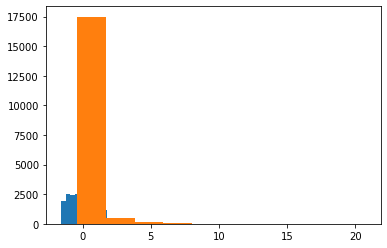

In [ ]:
# Distribution of Players in different clubs/countries

plt.hist(normalized_df['Nationality'])
plt.hist(normalized_df['Value'])
plt.show()


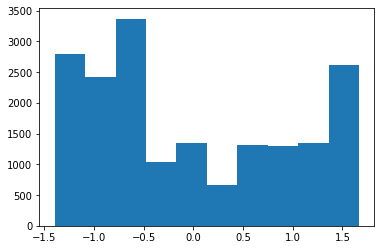

In [ ]:
plt.hist(normalized_df['Position'])
plt.show()

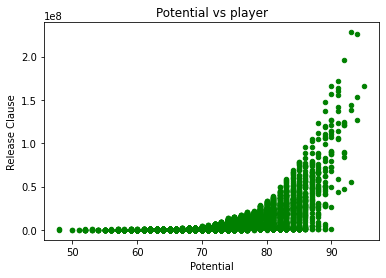

In [ ]:
data.plot(kind = 'scatter',x='Potential', y='Release Clause', alpha=1, color='green')
plt.xlabel('Potential')
plt.ylabel('Release Clause')
plt.title('Potential vs player')
plt.show()

Highest Potential is 94 for L. Messi and Cristiano Ronaldo who are having highest Release Clause Value.

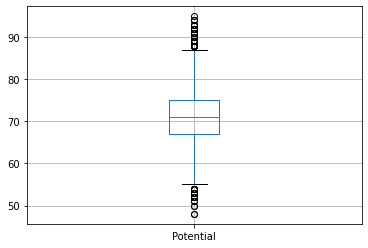

In [ ]:
data.boxplot(column='Potential')

In [ ]:
max(data['Overall'])

94

In [ ]:
data.groupby('Overall').describe()

ID                 ... Release Clause             
          count           mean  ...            75%          max
Overall                         ...                            
46          1.0  246269.000000  ...       165000.0     165000.0
47         20.0  242499.100000  ...       156000.0     175000.0
48         32.0  237259.375000  ...       143000.0    1100000.0
49         36.0  241318.805556  ...       143000.0     167000.0
50        103.0  241893.611650  ...       128000.0    1100000.0
51        125.0  241697.920000  ...       166000.0    1100000.0
52        159.0  238916.496855  ...       214000.0    1100000.0
53        199.0  238076.788945  ...       258000.0    1100000.0
54        250.0  238910.568000  ...       309000.0    1100000.0
55        265.0  237183.233962  ...       380000.0    1100000.0
56        343.0  236408.084548  ...       365500.0    1100000.0
57        402.0  234261.863184  ...       475000.0    1100000.0
58        444.0  232631.486486  ...       515250.0    1100000.0
59        525.0  230048.413333  ...       609000.0    1100000.0
60        649.0  230139.369800  ...       814000.0    1300000.0
61        711.0  226354.293952  ...       962500.0    1700000.0
62        878.0  222597.890661  ...      1100000.0    2000000.0
63       1002.0  219073.209581  ...      1000000.0    2400000.0
64       1091.0  217551.916590  ...      1100000.0    2900000.0
65       1045.0  214606.079426  ...      1200000.0    3300000.0
66       1163.0  211936.576096  ...      1400000.0    4200000.0
67       1118.0  210370.065295  ...      1700000.0    4900000.0
68       1035.0  209238.942995  ...      1900000.0    5600000.0
69        973.0  207279.820144  ...      2200000.0    6500000.0
70        889.0  205161.429696  ...      3800000.0   10400000.0
71        783.0  202425.651341  ...      5000000.0   12600000.0
72        753.0  203367.274900  ...      6800000.0   17100000.0
73        608.0  200448.026316  ...      8225000.0   19800000.0
74        537.0  202450.201117  ...     12000000.0   24900000.0
75        497.0  201176.217304  ...     15100000.0   30300000.0
76        373.0  198791.538874  ...     16900000.0   28400000.0
77        304.0  195369.253289  ...     19800000.0   46800000.0
78        168.0  205342.797619  ...     24700000.0   33600000.0
79        171.0  195847.052632  ...     28400000.0   41400000.0
80        143.0  191278.965035  ...     31900000.0   49400000.0
81         93.0  192564.935484  ...     39900000.0   56400000.0
82         94.0  193072.265957  ...     50175000.0   73100000.0
83         70.0  192856.871429  ...     58700000.0   90000000.0
84         45.0  182950.111111  ...     67200000.0   87100000.0
85         33.0  183123.333333  ...     78000000.0  121500000.0
86         22.0  183679.136364  ...    104200000.0  125100000.0
87         13.0  185632.538462  ...    114500000.0  123200000.0
88         17.0  176298.705882  ...    137300000.0  166100000.0
89         11.0  185212.363636  ...    138400000.0  165800000.0
90          5.0  184498.000000  ...    144500000.0  156800000.0
91          6.0  179797.833333  ...    170075000.0  196400000.0
92          1.0  190871.000000  ...    228100000.0  228100000.0
94          2.0   89412.000000  ...    201650000.0  226500000.0

[48 rows x 656 columns]

In [ ]:
data.shape


(18207, 83)

# Assignment 2 - Kmeans Clustering

In [ ]:
import random
import collections
from sklearn.metrics import silhouette_score
from sklearn import metrics

<b>Clustering</b> is used to get to know about the different groups that may exist in a dataset.We will try to split the dataset into different groups, such that the data points(Players) in the same group have similar characteristics than the data points in different groups.

<b> To find out which points(Players) have similar characterstics : </b> <br>
Use a distance metric to compute the distance between a point and every other point. The points that have less distance are more similar.

<li> Euclidean distance

  $ d\left( P,Q\right)   =  \sqrt {  \left( P_{x}-Q_{x}\right)^2 + \left( Q_{y}-P_{y}\right)^2}$  

<li> Manhatten distnace

  $ d\left( x,y\right)  =   \mid { \left( P_{x}-Q_{x}\right)}\mid  +  \mid {\left( Q_{y}-P_{y}\right)}\mid $  

#### There are 3 important steps in K-Means Clustering -

1. <b>Initialize centroids</b> – This is done by randomly choosing K no of points(Centroids), the points can be present in the dataset or also random points.
2. <b>Assign Clusters</b> – The clusters are assigned to each point in the dataset by calculating their distance from the centroid and assigning it to the centroid with minimum distance.
3. <b>Re-calculate the centroids</b> – Updating the centroid by calculating the centroid of each cluster we have created.

In [ ]:
X = np.array(normalized_df)

In [ ]:
m = X.shape[0] #number of training examples (i.e Number of rows in the dataset)
n = X.shape[1] #number of features (i.e Number of columns in the dataset)
print(m,n)

18207 83


## 1. Implement k-means clustering algorithm from scratch.

In [ ]:
from sklearn.cluster import KMeans

# Kmeans Class from scratch
class myKMeans:
    def __init__(self, n_clusters=2,  max_iter=50):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
      
    def fit(self, data , dist = 'euc') :
        self.centroids = collections.defaultdict(list)
        #creating k random centroids
        for i in range(self.n_clusters):
            self.centroids[i] = data[random.randint(0,m-1)]
        
        iteratn = 0
        while iteratn < self.max_iter :

            # Form Cluster map where key will be the centroid number and value will be datapoints closest to that centroid
            self.clusters = {}
            # Sum of distances of datapoints from their respective centroids
            self.inertia = 0

            for i in range(self.n_clusters):
                  self.clusters[i] = []

            for features in data:
                if dist == 'euc' :  # Euclidean Distance
                    distances = [np.linalg.norm(features-self.centroids[centroid_no]) for centroid_no in self.centroids]
                elif dist == 'man' : # Manhattan Distance
                    distances = [np.sum(abs(features - self.centroids[centroid_no])) for centroid_no in self.centroids]
                
                # Assign each datapoint to its closest centroid
                min_dist = min(distances)
                self.inertia += min_dist
                assign_to = distances.index(min_dist)
                self.clusters[assign_to].append(features)

            # Update Each centroid to new centroid by taking avg of all data items that belong to that particular centroid
            for indx in self.clusters:
                self.centroids[indx] = np.average(self.clusters[indx],axis=0)
            
            iteratn += 1
      
    def predict(self, data) :
        preds = []
        for features in data :
            dist = [np.linalg.norm(features-self.centroids[centroid_no]) for centroid_no in self.centroids]
            cluster_no = dist.index(min(dist))
            preds.append(cluster_no)
        return preds

In [ ]:
clf = myKMeans()
clf.fit(X)
print(np.array(list(clf.centroids.values())).shape)

(2, 83)


###  Visualising the Clusters and Centroids :
####  Since, Each of our Centroid has n=83 variables, we will use PCA transform for reducing the dimensionality from (k,83) to (k,2).

###### Visualising the dataset after PCA transformation

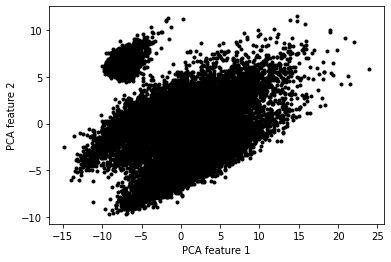

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_X = pd.DataFrame(pca.fit_transform(X))
plt.style.use('seaborn-bright')
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.scatter(pca_X[0], pca_X[1],marker = ".", color = "k")

## 2. Choose k = 3, 5, 7. Use only numerical attributes to cluster.

#### using Euclidean Distance

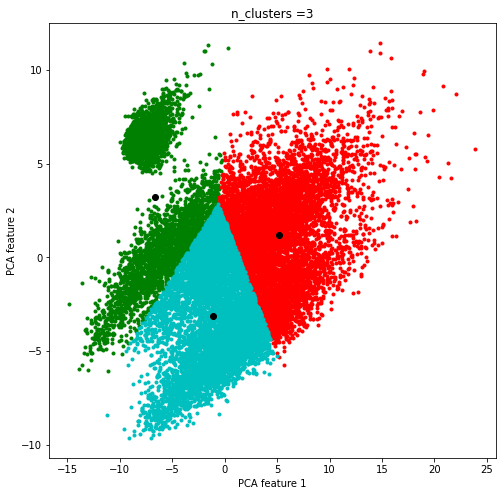

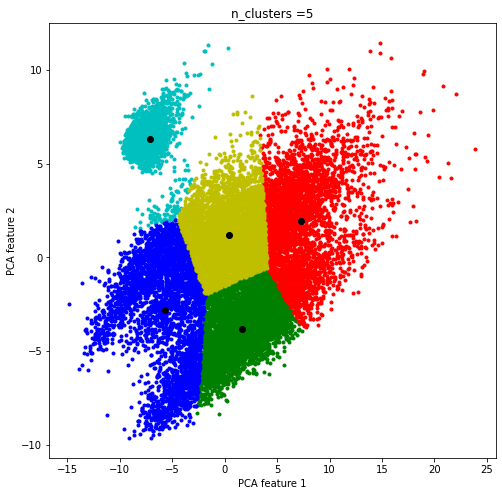

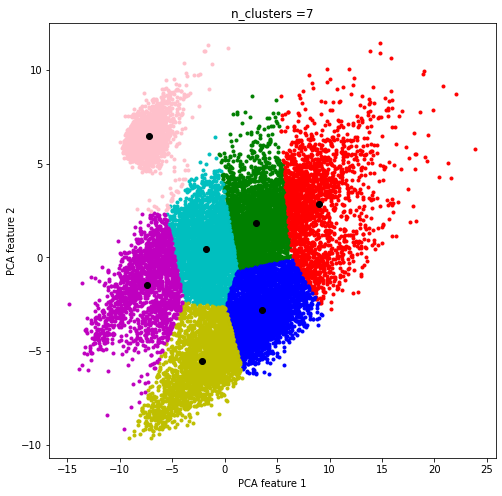

In [ ]:
K = [3,5,7]
colors = ["g","r","c","b","y","m","pink","k"]
for k in K :
    plt.figure(figsize=[8,8])
    pca_clusterng = myKMeans(n_clusters = k, max_iter = 20)
    pca_clusterng.fit(np.array(pca_X))

    centroids_ = pd.DataFrame(list(pca_clusterng.centroids.values()))
    
    for clstr in pca_clusterng.clusters:
        cluster_ = pd.DataFrame(list(pca_clusterng.clusters[clstr]))
        plt.scatter(cluster_[0], cluster_[1], marker =".", color = colors[clstr])

    plt.scatter(centroids_[0],centroids_[1],marker='o',color='k')
    plt.title("n_clusters ="+str(k))
    plt.xlabel("PCA feature 1") 
    plt.ylabel("PCA feature 2")      
    plt.show()

#### using Manhattan Distance

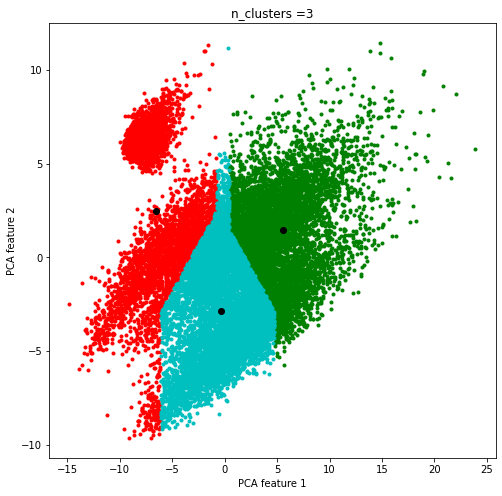

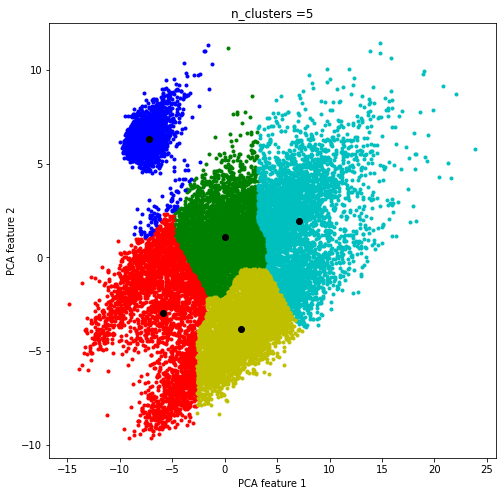

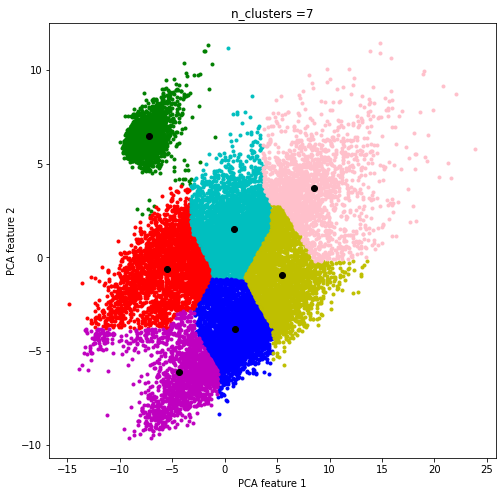

In [ ]:
K = [3,5,7]
colors = ["g","r","c","b","y","m","pink","k"]
for k in K :
    plt.figure(figsize=[8,8])
    pca_clusterng = myKMeans(n_clusters = k, max_iter = 20)

    # passing dist = 'man' for toggling manhattan distance computation in myKMeans.fit()
    pca_clusterng.fit(np.array(pca_X), dist='man')

    centroids_ = pd.DataFrame(list(pca_clusterng.centroids.values()))
    
    for clstr in pca_clusterng.clusters:
        cluster_ = pd.DataFrame(list(pca_clusterng.clusters[clstr]))
        plt.scatter(cluster_[0], cluster_[1], marker =".", color = colors[clstr])

    plt.scatter(centroids_[0],centroids_[1],marker='o',color='k')
    plt.title("n_clusters ="+str(k))
    plt.xlabel("PCA feature 1") 
    plt.ylabel("PCA feature 2")      
    plt.show()

## 3. Use elbow method and Silhouette Score to get optimal number of clusters.

#### Finding the optimal number of clusters
One of the important steps in K-Means Clustering is to determine the optimal no. of clusters we need to give as an input. This can be done by iterating it through a number of n values and then finding the optimal n value.

For finding this optimal n, two methods can be used:
<li> <b>  Elbow Method  </b>
<li> <b> Silhouette Method </b>

### Elbow Method
In order to determine the number of clusters, inertia is calculated for different K values from 1 to 9 with above KMeans algorithm and elbow method is applied. Elbow method consists of plotting the inertia as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

Elbow of the curve is defined as a small value of k where we start to have diminishing returns by increasing k.

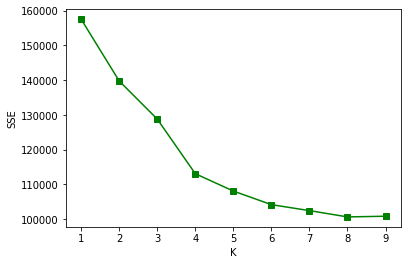

In [ ]:
#elbow from scratch
elbow = {}
for k in range(1, 10):
    kmeans = myKMeans(n_clusters = k, max_iter = 50)
    kmeans.fit(X)
    elbow[k] = kmeans.inertia
plt.figure()
plt.plot(list(elbow.keys()), list(elbow.values()), 'gs-')
plt.xlabel("K")
plt.ylabel("SSE") # sum of squared error (Sum of distances of datapoints from their respective centroids)
plt.show()

### Silhouette Coefficient Score
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). ... The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Silhouette Coefficient is defined for each sample and is composed of two scores: 

    a = The mean distance between a sample and all other points in the same cluster
    b = The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient for a single sample is then given as:

$  s  = \frac{b-a}{min(a,b)}  $  

Now, to find the optimal value of kMeans, loop through 1 to n for n_clusters in KMeans and calculate Silhouette Coefficient for each sample.

In [ ]:
#Silhoutte from scratch
silhouette = []
for k in range(1,10) :
  kmeans = myKMeans(n_clusters = k, max_iter = 10)
  kmeans.fit(X)
  
  s_lst = []
  for cno in kmeans.clusters :
    
    for i in range(len(kmeans.clusters[cno])):
      a_distances = [np.linalg.norm(kmeans.clusters[cno][i]-kmeans.clusters[cno][j]) for j in range(len(kmeans.clusters[cno])) ]
      a = np.average(a_distances,axis=0)
    
      b_distances = []
      for clstr in kmeans.clusters :
        if clstr == cno : pass
        b_distances.extend([np.linalg.norm(kmeans.clusters[cno][i]-kmeans.clusters[clstr][j]) for j in range(len(kmeans.clusters[clstr])) ])
      b = np.average(b_distances,axis=0)

      s = (b-a)/min(a,b)
      s_lst.append(s)
  silhouette.append(np.average(s_lst))

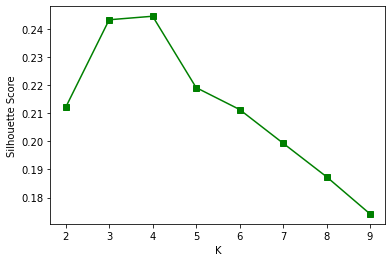

In [ ]:
silhouette = {}
for k in range(2,10) :
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  pred = kmeans.predict(X)
  score = silhouette_score(X,pred)
  silhouette[k]=score

plt.figure()
plt.plot(list(silhouette.keys()), list(silhouette.values()), 'gs-')
plt.xlabel("K")
plt.ylabel("Silhouette Score") 
plt.show()

### From above absorvation, optimal choice for number of clusters is clearly 4.

## 4. Analyse the results got in every case and try to mark each cluster.

Since, we found out optimal number of clusters to be 4. Lets Analyse the clusters with n_clustes = 4

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = np.array(pca.fit_transform(X))

In [ ]:
kmeans = myKMeans(n_clusters = 4, max_iter = 25)
kmeans.fit(reduced)

In [ ]:
pred = kmeans.predict(reduced)

In [ ]:
reduced = pd.DataFrame(reduced)
reduced['cluster'] = pred
reduced['name'] = names

In [ ]:
reduced.head()

,0,1,cluster,name
0,23.897584,5.776238,3,L. Messi
1,21.304045,5.038128,3,Cristiano Ronaldo
2,21.555501,4.223937,3,Neymar Jr
3,0.299440,11.150499,0,De Gea
4,22.080881,8.693262,3,K. De Bruyne


In [ ]:
reduced = reduced.sort_values('cluster')
reduced.head()

,0,1,cluster,name
3541,-7.760057,7.308528,0,A. Abedzadeh
11172,-7.757445,6.401408,0,P. Wiegers
16329,-8.666819,5.968387,0,O. Patiño
14851,-6.817291,5.335266,0,T. Königsmann
5572,-4.012111,2.064228,0,E. Ersoy


No handles with labels found to put in legend.


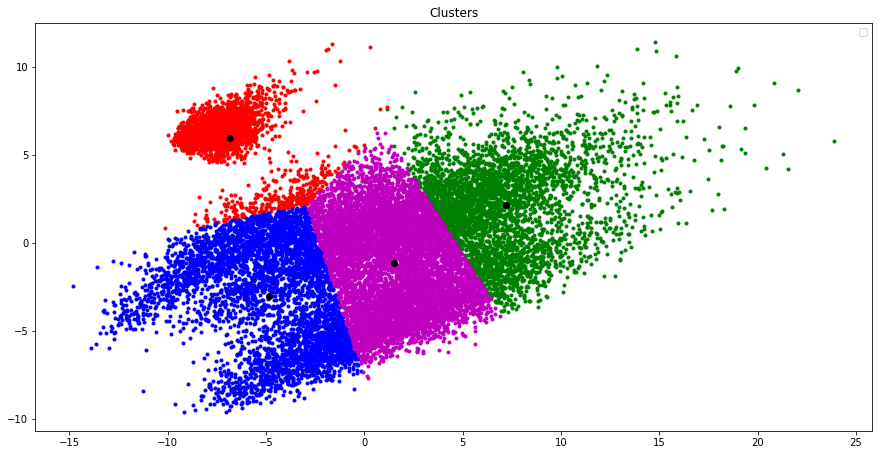

In [ ]:
reduced = reduced.sort_values('cluster')
colors = ["g","y","b","m","k"]
plt.figure(figsize=(15,7.5))
for i in range(4) :
  df = reduced[reduced['cluster']==i]
  plt.scatter(df[0], df[1], marker = '.', color = colors[i]  )
centroids_ = pd.DataFrame(list(kmeans.centroids.values()))
plt.scatter(centroids_[0],centroids_[1],marker='o',color='k')
plt.title('Clusters')
plt.legend()
plt.show()

In [ ]:
len(reduced)

18207

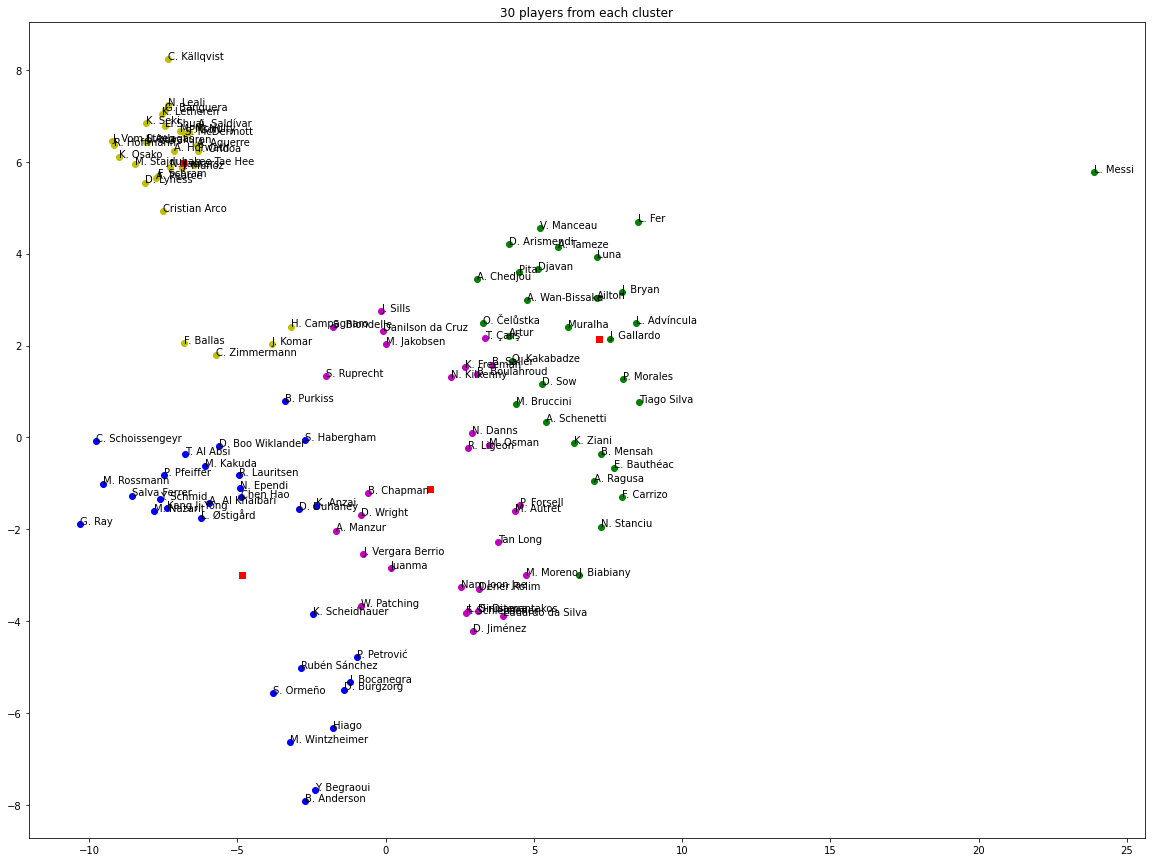

In [ ]:
colors = ["g","y","b","m","k"]
plt.figure(figsize=(20,15))
for i in range(4) :
  df = reduced[reduced['cluster']==i]
  for j in range(30) :
    plt.scatter(df.iloc[[j]][0], df.iloc[[j]][1] , marker = 'o', color= colors[i])
    plt.text(df.iloc[[j]][0], df.iloc[[j]][1], s = df.iloc[[j]].iloc[0]['name'])
centroids_ = pd.DataFrame(list(kmeans.centroids.values()))
plt.scatter(centroids_[0],centroids_[1],marker='s',color='r')
plt.title('30 players from each cluster')
plt.show()

Observtions :

<li> Cluster in yellow color is the cluster of Goalkeepers such as C Kallqvist
<li> Cluster in blue color is the cluster of players who play as Defender or mid such as Maximilian Rossmann
<li> Cluster with pink is the cluster of players who in the mid and front
<li> Green colored cluster is the cluster of players who play in forward postion as attackers


# Assignment 3 - Agglomerative clustering and hierarchial clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [150]:
# Reduce dimensionality using PCA with two components
pca = PCA(n_components = 2)
data_PCA = pca.fit_transform(normalized_df)
data_PCA = pd.DataFrame(data_PCA)
#data_PCA.columns = ['P1', 'P2']

In [151]:
data_PCA.head()

,0,1
0,23.897584,5.776238
1,21.304045,5.038128
2,21.555501,4.223937
3,0.299440,11.150499
4,22.080881,8.693262


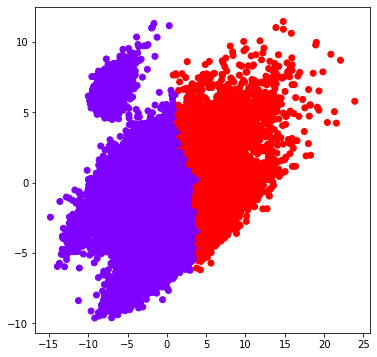

In [ ]:
# Number of clusters is 2
Bottom_top_cluster2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_PCA['P1'], data_PCA['P2'], 
           c = Bottom_top_cluster2.fit_predict(data_PCA), cmap ='rainbow')
plt.show()

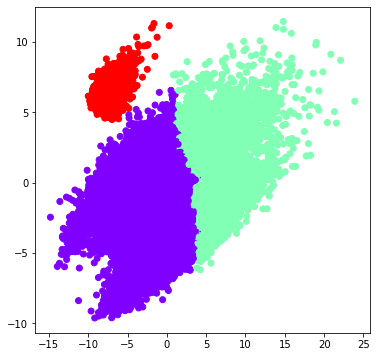

In [ ]:
# Number of clusters is 3
Bottom_top_cluster3 = AgglomerativeClustering(n_clusters = 3)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_PCA['P1'], data_PCA['P2'], 
           c = Bottom_top_cluster3.fit_predict(data_PCA), cmap ='rainbow')
plt.show()

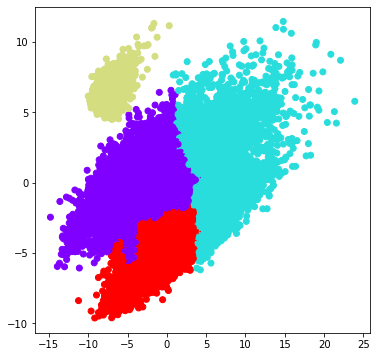

In [ ]:
# Number of clusters is 4
Bottom_top_cluster4 = AgglomerativeClustering(n_clusters = 4)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_PCA['P1'], data_PCA['P2'], 
           c = Bottom_top_cluster4.fit_predict(data_PCA), cmap ='rainbow')
plt.show()

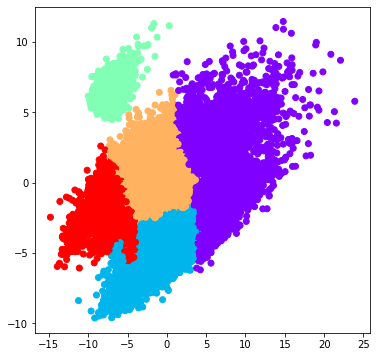

In [ ]:
# Number of clusters is 5
Bottom_top_cluster5 = AgglomerativeClustering(n_clusters = 5)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_PCA['P1'], data_PCA['P2'], 
           c = Bottom_top_cluster5.fit_predict(data_PCA), cmap ='rainbow')
plt.show()

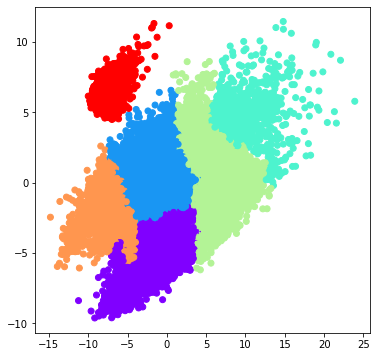

In [ ]:
# Number of clusters is 6
Bottom_top_cluster6 = AgglomerativeClustering(n_clusters = 6)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(data_PCA['P1'], data_PCA['P2'], 
           c = Bottom_top_cluster6.fit_predict(data_PCA), cmap ='rainbow')
plt.show()

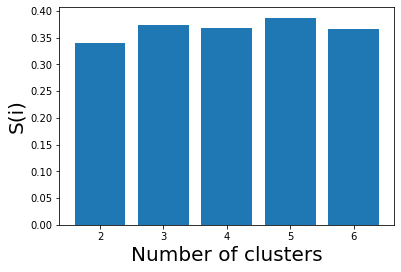

In [ ]:
#Evaluating the different models and Visualizing the results.
k = [2, 3, 4, 5, 6]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(data_PCA, Bottom_top_cluster2.fit_predict(data_PCA)))
silhouette_scores.append(
        silhouette_score(data_PCA, Bottom_top_cluster3.fit_predict(data_PCA)))
silhouette_scores.append(
        silhouette_score(data_PCA, Bottom_top_cluster4.fit_predict(data_PCA)))
silhouette_scores.append(
        silhouette_score(data_PCA, Bottom_top_cluster5.fit_predict(data_PCA)))
silhouette_scores.append(
        silhouette_score(data_PCA, Bottom_top_cluster6.fit_predict(data_PCA)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

# Observation - 
From silhouette_scores it is evident that optimal number of clusters for the given data and clustering technique is 5

## Divisive Clustering

In [100]:
from scipy.spatial.distance import pdist,squareform


In [156]:
distance_matrix = squareform(pdist(data_PCA, metric='euclidean'))
all_elements = data_PCA.columns

In [143]:
def avg_dissim_within_group_element(ele, element_list):
    max_diameter = -np.inf
    sum_dissm = 0
    for i in element_list:
        sum_dissm += distance_matrix[ele][i]   
        if( dissimilarity_matrix[ele][i]  > max_diameter):
            max_diameter = distance_matrix[ele][i]
    if(len(element_list)>1):
        avg = sum_dissm/(len(element_list)-1)
    else: 
        avg = 0
    return avg

In [144]:
def avg_dissim_across_group_element(ele, main_list, splinter_list):
    if len(splinter_list) == 0:
        return 0
    sum_dissm = 0
    for j in splinter_list:
        sum_dissm = sum_dissm + distance_matrix[ele][j]
    avg = sum_dissm/(len(splinter_list))
    return avg

In [145]:
def splinter(main_list, splinter_group):
    most_dissm_object_value = -np.inf
    most_dissm_object_index = None
    for ele in main_list:
        x = avg_dissim_within_group_element(ele, main_list)
        y = avg_dissim_across_group_element(ele, main_list, splinter_group)
        diff= x -y
        if diff > most_dissm_object_value:
            most_dissm_object_value = diff
            most_dissm_object_index = ele
    if(most_dissm_object_value>0):
        return  (most_dissm_object_index, 1)
    else:
        return (-1, -1)

In [159]:
def split(element_list):
    main_list = element_list
    splinter_group = []    
    (most_dissm_object_index,flag) = splinter(main_list, splinter_group)
    while(flag > 0):
        #main_list.remove(most_dissm_object_index)
        main_list.drop(most_dissm_object_index)
        splinter_group.append(most_dissm_object_index)
        (most_dissm_object_index,flag) = splinter(element_list, splinter_group)
    
    return (main_list, splinter_group)

In [148]:
def max_diameter(cluster_list):
    max_diameter_cluster_index = None
    max_diameter_cluster_value = -np.inf
    index = 0
    for element_list in cluster_list:
        for i in element_list:
            for j in element_list:
                if dissimilarity_matrix[i][j]  > max_diameter_cluster_value:
                    max_diameter_cluster_value = dissimilarity_matrix[i][j]
                    max_diameter_cluster_index = index
        
        index +=1
    
    if(max_diameter_cluster_value <= 0):
        return -1
    
    return max_diameter_cluster_index

In [153]:
data_PCA.head()

,0,1
0,23.897584,5.776238
1,21.304045,5.038128
2,21.555501,4.223937
3,0.299440,11.150499
4,22.080881,8.693262


In [ ]:
current_clusters = ([all_elements])
level = 1
index = 0
while(index!=-1):
    print(level, current_clusters)
    (a_clstr, b_clstr) = split(current_clusters[index])
    del current_clusters[index]
    current_clusters.append(a_clstr)
    current_clusters.append(b_clstr)
    index = max_diameter(current_clusters)
    level +=1


1 [RangeIndex(start=0, stop=2, step=1)]


In [ ]:
print(current_clusters)

In [158]:
current_clusters

[RangeIndex(start=0, stop=2, step=1)]

# Assignment 4 - DBSCAN

<h2> DBSCAN - Density-Based Spatial Clustering of Applications with Noise </h2>

DBSCAN is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

<h4>The DBSCAN algorithm uses two parameters: </h4 >

<li> <b>eps (ε):</b> Epsilon (eps) is the radius of the circle to be created around each data point to check the density.
<li> <b>minPts:</b> The minPts is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

    Points :
    Core point: This is a point that has at least m points within distance n from itself.
    Border point: This is a point that has at least one Core point at a distance n.
    Noise (outlier): Any point that is neither a core point nor a border point.

<b> How are the clusters formed? </b>

<ol> 
<li> Select a point p
  <ul> 
   <li> Retrieve all points density-reachable from p w.r.t. eps and MinPts.
   <li> If p is a core point, a cluster is formed.
  </ul>
<li> If p is a border point, no points are density-reachable from p and DBSCAN visits the next point of the database.
<li> Continue the process until all of the points have been processed.
<li> The result is independent of the order of processing the points

In [ ]:
X = np.array(normalized_df)

In [ ]:
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
df = pd.DataFrame(pca.fit_transform(X)) 
df.head()

,0,1
0,23.897584,5.776238
1,21.304045,5.038128
2,21.555501,4.223937
3,0.299440,11.150499
4,22.080881,8.693262


We first transformed the 83 features dataset into 2 featured dataset using PCA transformation

Now, Let’s plot these data points and see how they look in the feature space.

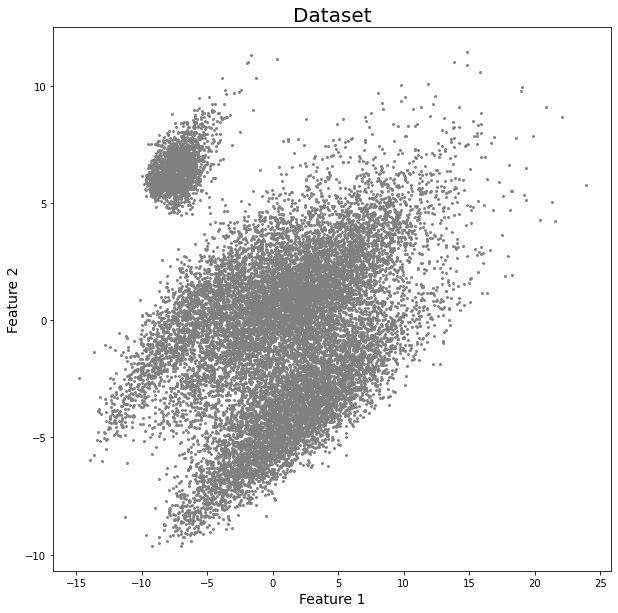

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,marker='.' ,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

As we have observed earlier, Our dataset after PCA trasformation simply seems to separate Goalkeepers from all other players

Applying DBSCAN clustering

In [ ]:
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

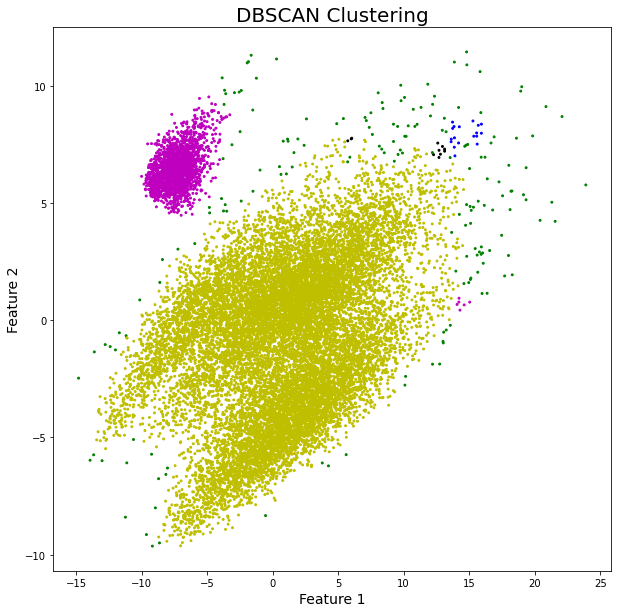

In [ ]:
import matplotlib.colors
df['DBSCAN_labels']=dbscan.labels_ # Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],marker='.',cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Defualt Value of epsilon(0.5) and minpts(4) separated goalkeepers (PINK) and other players (Yellow and blue) into clusters and also detected some outliers (green).

<h3> Lets try to find best values for minpts and  eps : </h3>

In [ ]:
import math
from sklearn.metrics import silhouette_score
minpts_ = [2,3,4]
eps_ = [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7,1,1.5,2]
max_ = (-math.inf,-1)
for i in eps_:
    model = DBSCAN(eps = i, min_samples = 5).fit(df)
    labels = model.labels_
    try :
      score = silhouette_score(df,labels)
    except :
      score = -math.inf
    max_ = (score,i) if score > max_[0] else max_

In [ ]:
print(max_)

(0.6412779392822837, 2, 0.10000007)


<h4> We got largest Silhouette score for minpts = 2 and eps = 0.1  </h4>

In [ ]:
dbscan=DBSCAN(eps = 0.1 , min_samples=2)
dbscan.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

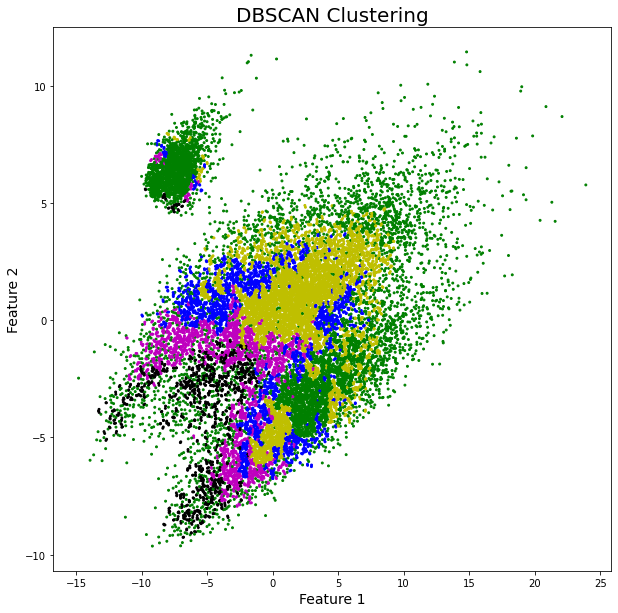

In [ ]:
import matplotlib.colors
colors = ["g","y","b","m","k"]
df['DBSCAN_labels']=dbscan.labels_ # Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],marker ='.'  , cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

With minpts = 2, Trying for different eps

In [ ]:
import math
from sklearn.metrics import silhouette_score
max_ = (-math.inf,-1,-1)
mp = {'eps' : [], 'minpts' : [], 'silhouette score' : []}
for i in range(2,3):
  j= 0.09
  while j < 0.11:
    model = DBSCAN(eps =j, min_samples = i).fit(df)
    labels = model.labels_
    score = silhouette_score(df,labels)
    max_ = (score,i,j) if score > max_[0] else max_
    mp['eps'].append(j)
    mp['minpts'].append(i)
    mp['silhouette score'].append(score)
    j += 0.001


In [ ]:
print(max_)

(-0.08692878168989497, 2, 0.11)


<h4> We got largest Silhouette score for minpts = 2 </h4>

<h3> Now lets try to find better epsilon value </h3>

In [ ]:
dbscan=DBSCAN(eps = 0.11 , min_samples=2)
dbscan.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=0.11, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

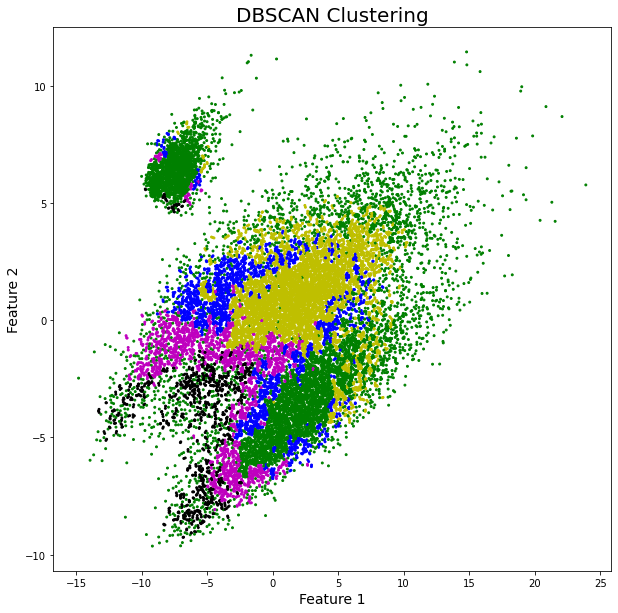

In [ ]:
import matplotlib.colors
colors = ["g","y","b","m","k"]
df['DBSCAN_labels']=dbscan.labels_ # Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],marker='.', cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

USING N Nearest Neighbours :

In [ ]:
from sklearn.neighbors import NearestNeighbors
#Creating Nearest Neighbor list with respect to their index number
nbrs = NearestNeighbors(n_neighbors=3).fit(df) # every point is its closes neighbor
distances, indices = nbrs.kneighbors(df) #Extracting euclidean distance and index numbers

In [ ]:
distances

array([[0.        , 2.69652589, 2.80980254],
       [0.        , 0.85213667, 1.18314592],
       [0.        , 0.85213667, 1.14891519],
       ...,
       [0.        , 0.55702699, 1.05852039],
       [0.        , 0.23713192, 0.2457841 ],
       [0.        , 0.08603371, 0.08797717]])

So, <i><b>distances</b></i> is a distance point list from core point to core point, core point to 1st nearest point & core point to 2nd nearest point.

In [ ]:
indices

array([[    0,     1,     2],
       [    1,     2,     5],
       [    2,     1,     5],
       ...,
       [18204, 18200, 18140],
       [18205, 18176, 18084],
       [18206, 18139, 17715]])

<i><b>indices</b></i> is a index numbers list with repect to the distances which we have calculated above.

In [ ]:
#Sorting the 2nd nearest distance values in descending order
distanceDec = sorted(distances[:,2], reverse=True)
distanceDec[:5]

[2.8098025435095932,
 2.4863602367224376,
 2.3884810886210106,
 2.320170815222895,
 2.1934681269514167]

We choose 2nd nearest neighbor distance in descending order through which we can determine the radius though ploting.

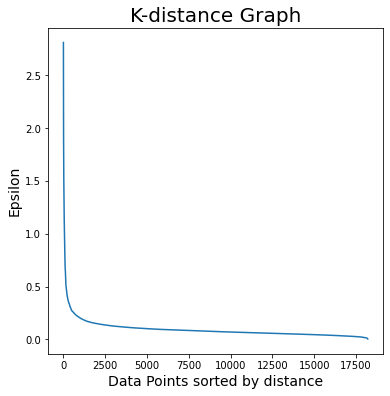

In [ ]:
# Plotting K-distance Graph
plt.figure(figsize=(6,6))
plt.plot(distanceDec)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

As per graph, It indicates that between 0.2 to 0.4 is the optimal point.

In [ ]:
#Implementing DBSCAN with eps = 0.3
db = DBSCAN(eps = 0.3, min_samples=2).fit(df)

In [ ]:
#Checking the cluster labels generated from DBSCAN
db.labels_

array([-1, -1, -1, ..., -1, 94,  8])

In [ ]:
#Counting how many -1 or outliers in the labels
n_noise_ = list(db.labels_).count(-1)
n_noise_

218

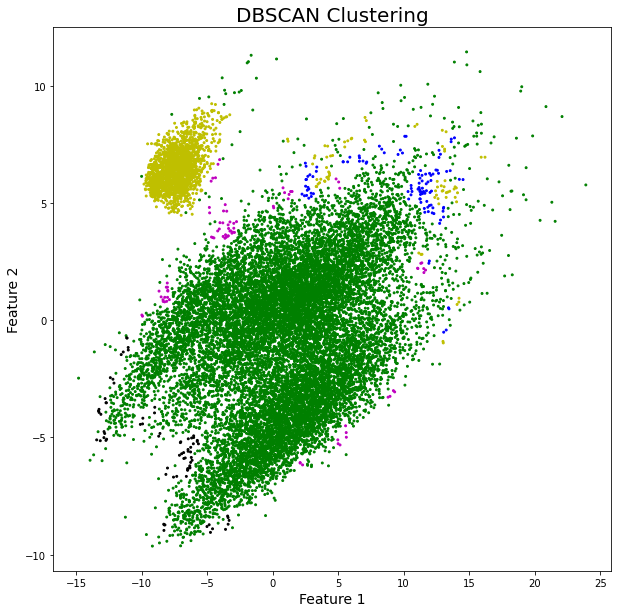

In [ ]:
import matplotlib.colors
colors = ["g","y","b","m","k"]
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=db.labels_,marker='.', cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

OBSERVATION :

<li>DBSCAN clusters are of irregular shapes as compared to Kmeans clusters for our dataset

<li> It can detect those outliers that are not a part of any cluster easily

# Report

Kmeans need number of clusters as input, Optimal number of clusters have to be determined by analysing the data or using methods like elbow method and Silhouette score

<li>DBSCAN clusters are of irregular shapes as compared to Kmeans clusters for our dataset

<li> It can detect those outliers that are not a part of any cluster easily